Project available on: https://drive.google.com/file/d/1L3RyoUdWR85BnWusL0RagvxmqXwms0o5/view?usp=sharing

## 1.Import libraries and data reading.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set the current project directory to facilitate the data loading.
directorio = os.getcwd()
data_path = os.path.join(directorio, 'heart_statlog_cleveland_hungary_final.csv')
df = pd.read_csv(data_path)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



 ## Heart Disease Dataset Attribute Description

| S.No. | Attribute                                | Code given            | Unit                | Data type  |
|-------|------------------------------------------|------------------------|---------------------|------------|
| 1     | Age                                      | Age                    | in years            | Numeric    |
| 2     | Sex                                      | Sex                    | 1, 0                | Binary     |
| 3     | Chest pain type                          | chest pain type        | 1,2,3,4             | Nominal    |
| 4     | Resting blood pressure                   | resting bp s           | in mm Hg            | Numeric    |
| 5     | Serum cholesterol                        | cholesterol            | in mg/dl            | Numeric    |
| 6     | Fasting blood sugar                      | fasting blood sugar    | 1,0 > 120 mg/dl     | Binary     |
| 7     | Resting electrocardiogram results        | resting ecg            | 0,1,2               | Nominal    |
| 8     | Maximum heart rate achieved              | max heart rate         | 71–202              | Numeric    |
| 9     | Exercise induced angina                  | exercise angina        | 0,1                 | Binary     |
| 10    | Oldpeak = ST                             | oldpeak                | depression          | Numeric    |
| 11    | The slope of the peak exercise ST segment| ST slope               | 0,1,2               | Nominal    |
| 12    | Class                                    | target                 | 0,1                 | Binary     |

### Description of Nominal Attributes

- **Sex**
  - 1 = male, 0 = female

- **Chest Pain Type**
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic

- **Fasting Blood Sugar**
  - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- **Resting Electrocardiogram Results**
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria

- **Exercise Induced Angina**
  - 1 = yes; 0 = no

- **The Slope of the Peak Exercise ST Segment**
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping

- **Class**
  - 1 = heart disease, 0 = Normal

data available in: https://docs.google.com/spreadsheets/d/1eMwz2uLEBIyUC_mLq-E1yPw6fctSHG5gBzPXNeYqU1o/pub?output=csv
or:https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

Let's check the shape of our dataset and whether it has any null/na values or not.

In [3]:
print(df.shape)
print(df.isnull().sum())

(1190, 12)
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Due to the quality of the data, it is not necessary to perform any drop operations.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Let's check out the distribution of our target

In [6]:
df['target'].value_counts()


target
1    629
0    561
Name: count, dtype: int64

## 2.Exploratory Data analysis.

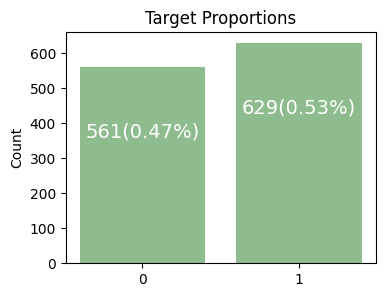

In [7]:

df_target_count = df['target'].value_counts()

# Create the plot layout
fig, ax = plt.subplots(figsize=(4,3))

# Create the bar graphic with the Target proportion
ax.bar(df_target_count.index.to_list(), df_target_count.to_list(),
       color="darkseagreen")
ax.set_title("Target Proportions")
ax.set_ylabel("Count")

# Set on each bar information like count and percentage
for x,y in enumerate(df_target_count.to_list()):
     plt.text(abs(x-1), y-200, (str(round(y, 1))+"("+ str(round(y/len(df), 2))+ "%)"), ha='center', fontsize=14, color = 'white')

# Set the label on edge x
plt.xticks(df_target_count.index.to_list())
fig.show()

The data seems to have good target proportions, so we can move on to an exploratory analysis of the relationships among the data features.


### Distribution of continuous variables.

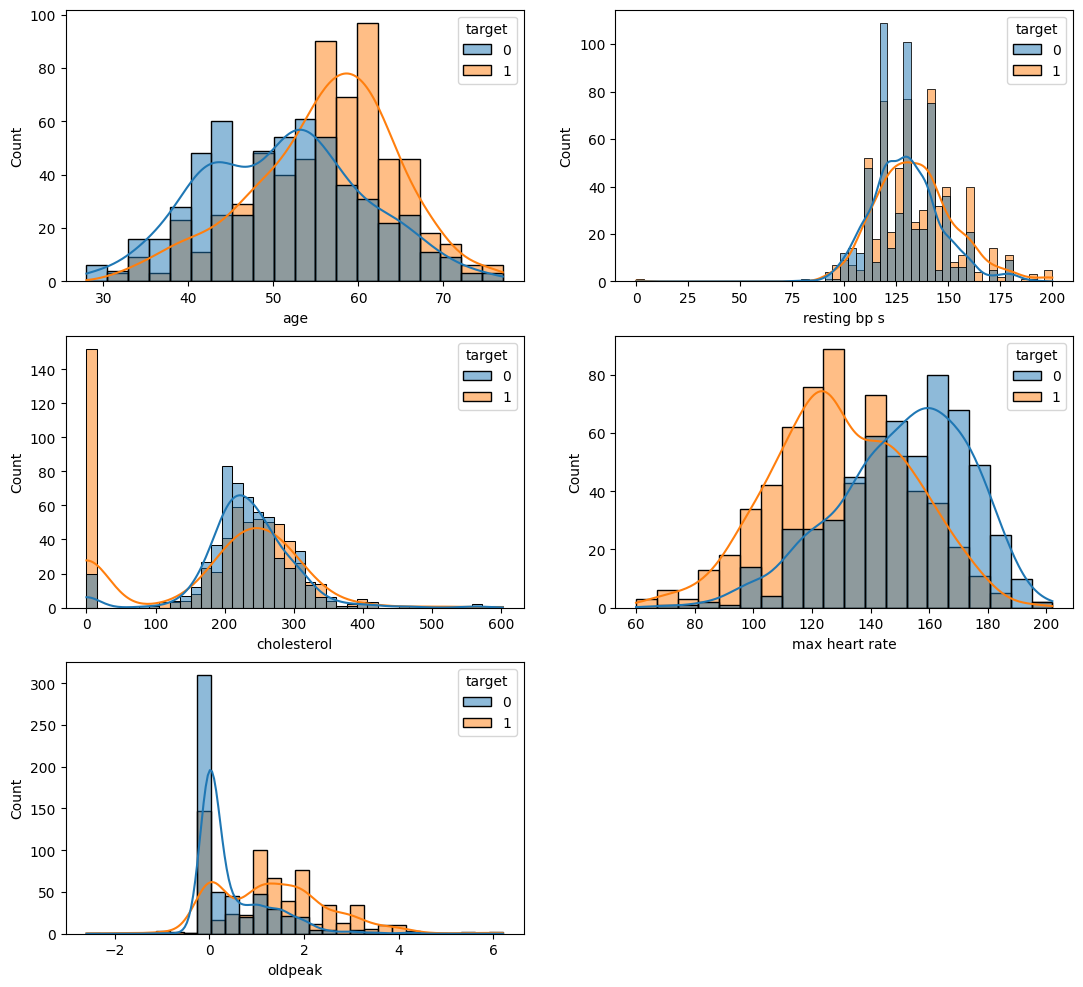

In [8]:
# Select columns by nominal or numeric write labels
num_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']


fig, axes = plt.subplots(3, 2, figsize=(13,12))

# Convert the axis of plt to a simple list
axes = axes.flatten()
# Deactivate the last subplot due there are 5 features and 6 slots to graph
axes[-1].axis('off')
for i, column in enumerate(num_columns):
    sns.histplot(df, x=column, kde=True, ax=axes[i], hue='target')



One of the graphs shows multiple data points for 'cholesterol' with a value of 0, which is theoretically impossible since a person can't have 0 cholesterol. The same issue occurs with 'resting bp s'. Additionally, the feature 'oldpeak' has negative values, which is also impossible.

### Distribution of nominal variables.

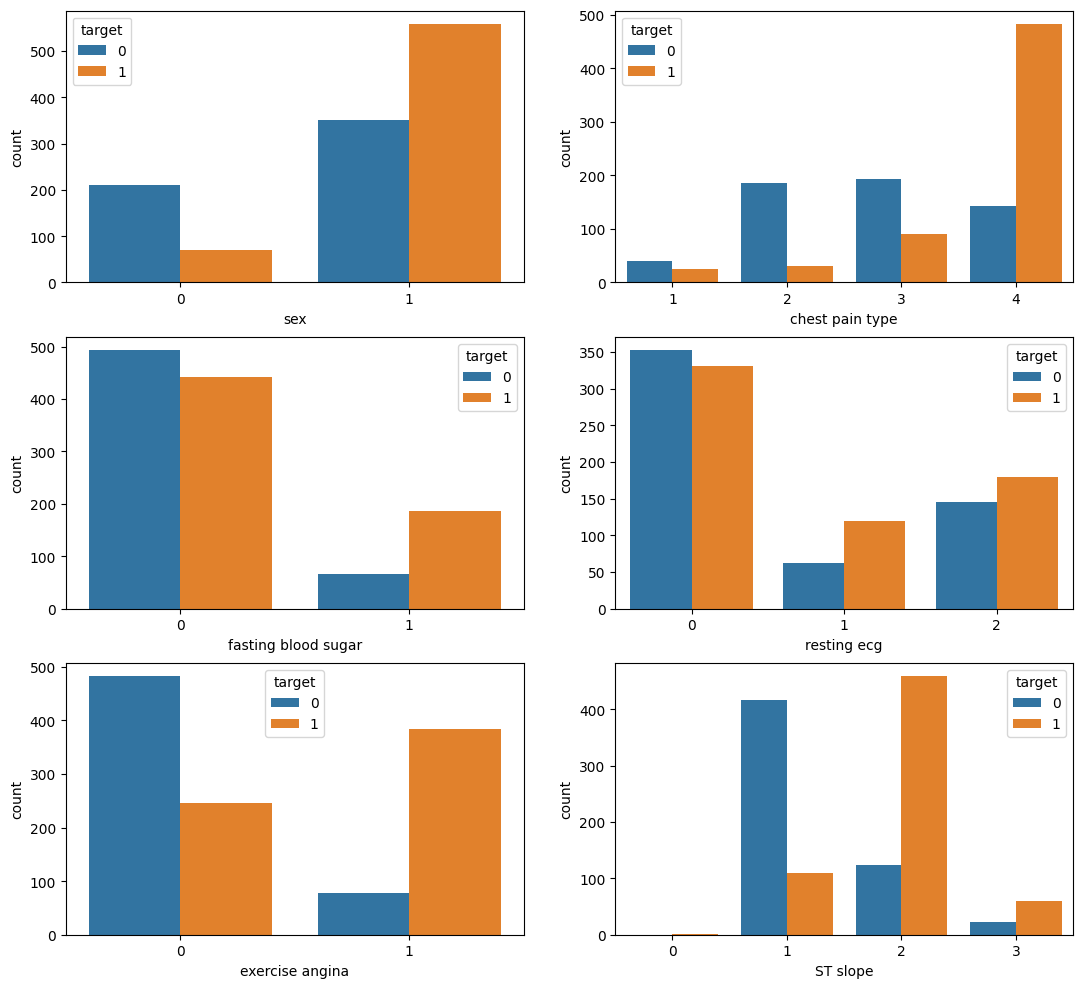

In [9]:
# If a column is nominal then isn't numeric
nom_columns = [col for col in df.columns.to_list() if col not in num_columns]

# Remove the target because we've already graph it
nom_columns.remove('target')

fig, axes = plt.subplots(3,2, figsize=(13,12))

axes = axes.flatten()

for i, col in enumerate(nom_columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue='target')


### Correlation

Text(0.5, 1.0, 'Correlation')

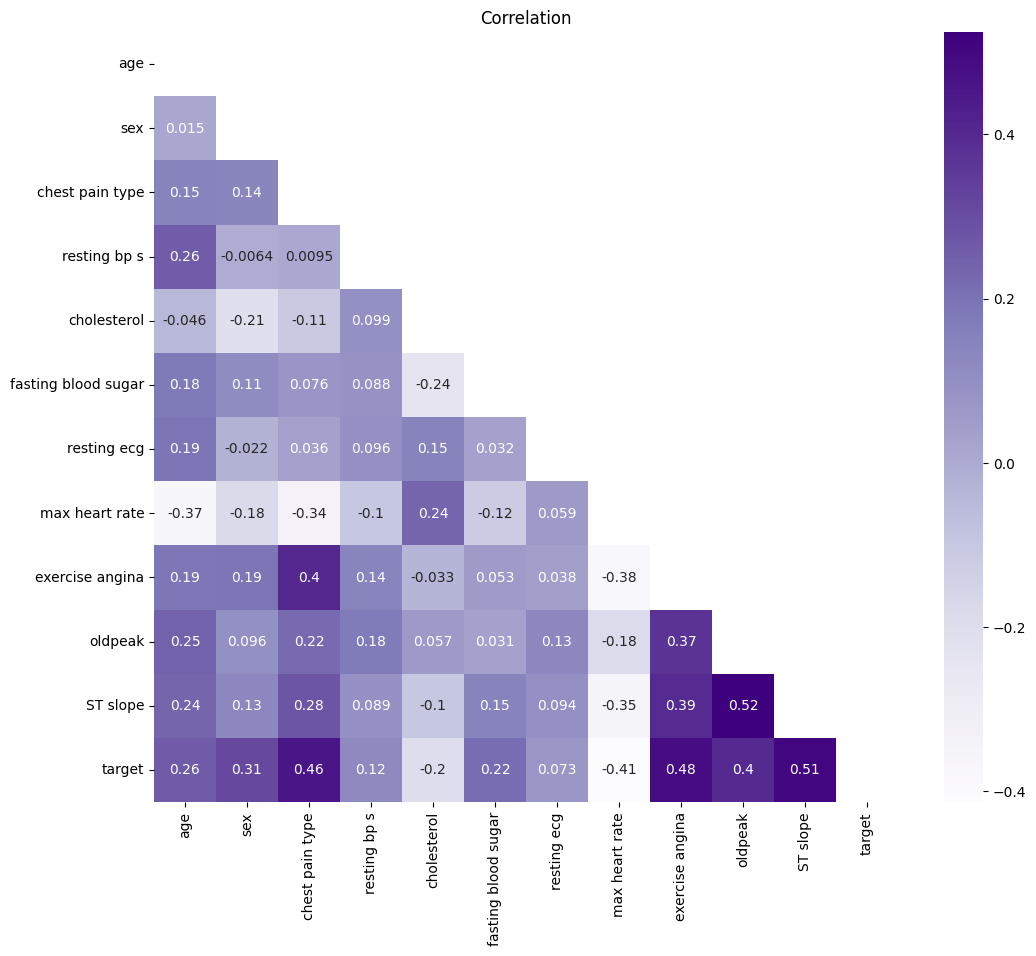

In [10]:
plt.figure(figsize=(12, 10))

# Generate correlation matrix dataframe
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with numerical annotations
sns.heatmap(corr_matrix, cmap='Purples', annot=True, mask=mask)


plt.title('Correlation')

* The features **'Chest pain type'**, **'ST slope'**, **'oldpeak'**, **'Exercise angina'** are positively correlated with the **target**, while **'max heart rate'** is negatively correlated.

* **'old peak'** and **'ST slope'** show a high positive corroleation.

*  **'max heart rate'**,  **'Exercise angina'**, **'oldpeak'**, **'ST slope'** display a high correlation amongst almost all of them.


In [11]:
# Copy the correlation matrix to not alterate the original
corr_plot = corr_matrix.copy()

# Fill the diagonal of the copy with zeros due to the conditional in the next codeline
np.fill_diagonal(corr_plot.values, 0)

# Choose only the columns of interest (correlation bigger than 0.4)
to_plot = [column for column in corr_plot.columns if any(abs(corr_plot[column]) >= 0.4)]
print(to_plot)

['chest pain type', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


Now let's observe how the variables with high correlation behave with each other.

<Figure size 1600x1600 with 0 Axes>

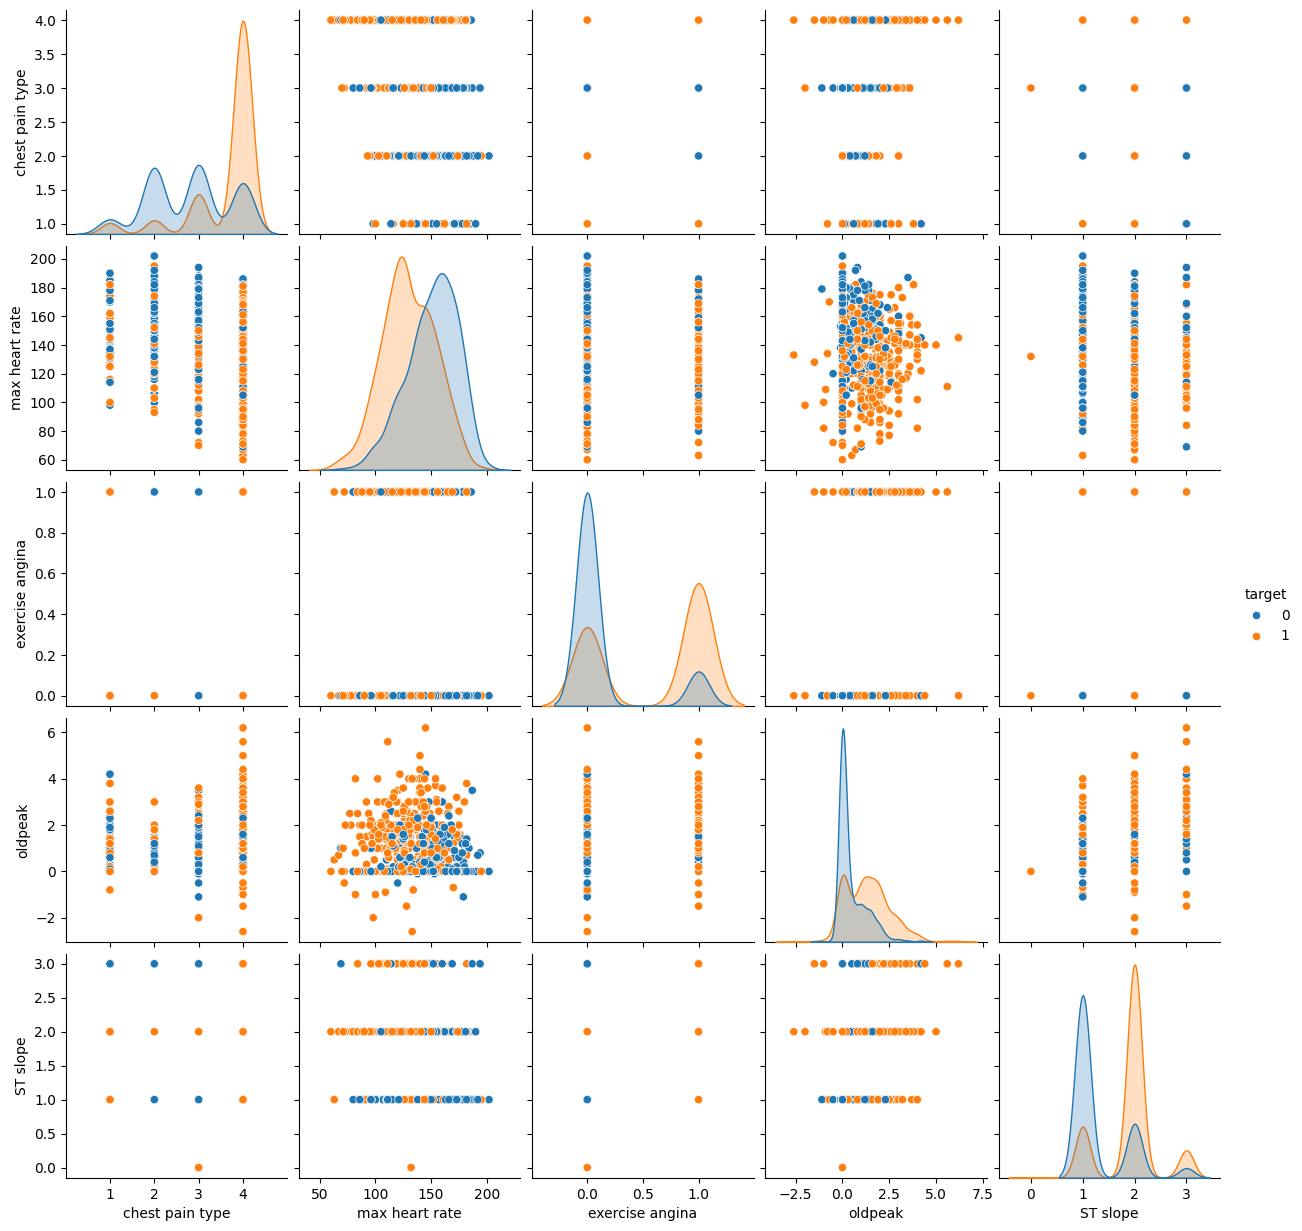

In [12]:
plt.figure(figsize=(16, 16))
sns.pairplot(df[to_plot], hue="target")

Since 3 out of the 5 features are nominal, the pairplot doesn't provide much insight. However, it does reveal some aspects, such as the negative correlation between 'max heart rate' and 'ST slope'.

## 3. Data Cleaning and Results Analysis

### Data cleaning

In section **2** were noted 3 inconsistencies on the data:

* **"cholesterol"** contains data with a value of 0.

* **"resting bp s"** has data with a value of 0.

* **"oldpeak"**,  has negative values.

So, let's now clean the data to handle these errors.

How many data points have a cholesterol of 0 ?

In [13]:
print(df[df["cholesterol"]==0]["target"].value_counts())


target
1    152
0     20
Name: count, dtype: int64


Dropping these values will result in the loss of many samples with target=1, but since the dataset has slightly more samples with target=1 than target=0, we can proceed confidently.


Once all the cleaning is complete, the balance of the target will be examined.

In [14]:
# Crate the mask for data with values of cholesterol or resting bp = 0
clean_mask_chol_rest = (df[["cholesterol", "resting bp s"]] <= 0).any(axis=1)

# Create them mask for data with values below 0 in oldpeak
clean_mask_oldpeak = df["oldpeak"] < 0

# Join the two mask from above, with an "or" operator
clean_mask = clean_mask_oldpeak | clean_mask_chol_rest

df_cleaned = df.copy()
# Applying the mask on the dataset, selecting the desired datapoints
df_cleaned = df_cleaned[~clean_mask]

# Showing the target balance
df_cleaned["target"].value_counts()

target
0    540
1    477
Name: count, dtype: int64

In [15]:
percentage = 1 - len(df_cleaned)/len(df)
print("Data lost percentage:",round(percentage,3))
print("Cleanned data size:", len(df_cleaned))

Data lost percentage: 0.145
Cleanned data size: 1017


The percentage of data lost during the cleaning process was 14.5%, leaving us with 1017 datapoints.

### Graphs of the dataset after cleaning

Text(0.5, 1.0, 'Correlation')

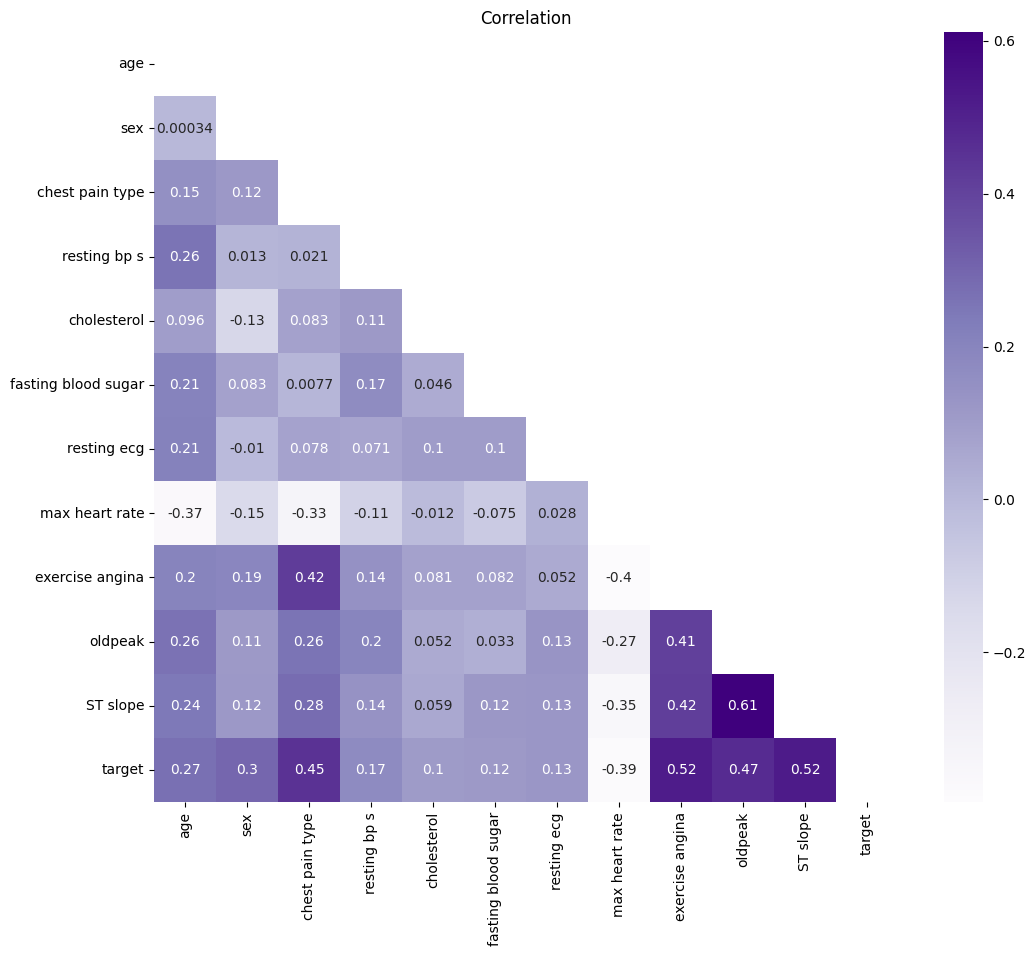

In [16]:
plt.figure(figsize=(12, 10))

# Generate correlation matrix dataframe
corr_matrix_cleaned = df_cleaned.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_cleaned, dtype=bool))

# Plot heatmap with numerical annotations
sns.heatmap(corr_matrix_cleaned, cmap='Purples', annot=True, mask=mask)


plt.title('Correlation')

Let us compare the original target correlation and the target correlation of the cleaned data:

In [17]:
# Combine the correlations into a DataFrame to facilitate their illustration
comparison = pd.concat([corr_matrix.iloc[-1,:], corr_matrix_cleaned.iloc[-1,:]], axis=1)

# Rename DataFrame columns
comparison.columns = ["Original Corrleation", "Cleaned Correlation"]
comparison

,Original Corrleation,Cleaned Correlation
age,0.262029,0.272943
sex,0.311267,0.297330
chest pain type,0.460127,0.450995
resting bp s,0.121415,0.170831
cholesterol,-0.198366,0.104601
fasting blood sugar,0.216695,0.115497
resting ecg,0.073059,0.126768
max heart rate,-0.413278,-0.387547
exercise angina,0.481467,0.518815
oldpeak,0.398385,0.469736


It can be observed that the correlations with the target changed slightly, especially cholesterol, which shifted from a negative one to a positive magnitude.


Let's see the nominal distributions after the clean up.

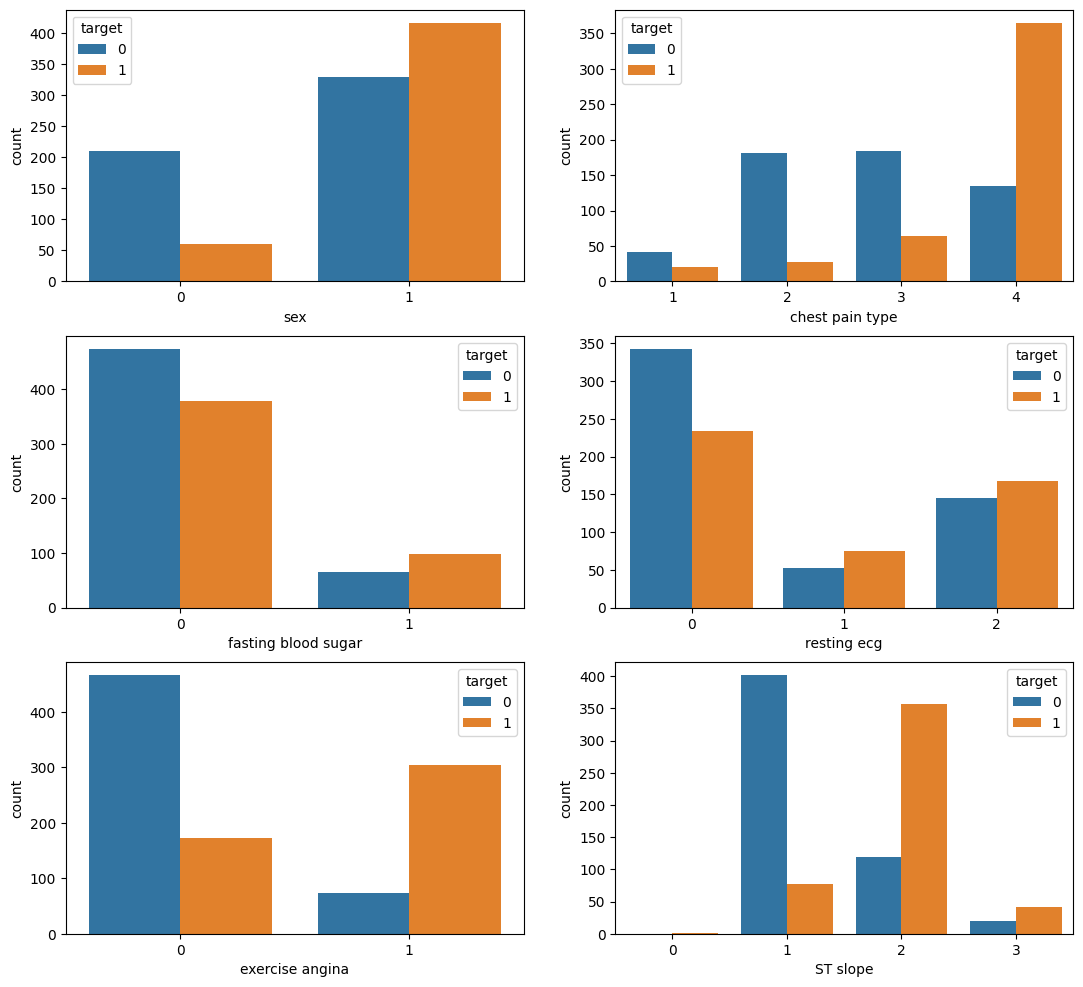

In [18]:
# If a column is nominal then isn't numeric
nom_columns = [col for col in df_cleaned.columns.to_list() if col not in num_columns]

# Remove the target because we've already graph it
nom_columns.remove('target')

fig, axes = plt.subplots(3,2, figsize=(13,12))

axes = axes.flatten()

for i, col in enumerate(nom_columns):
    sns.countplot(data=df_cleaned, x=col, ax=axes[i], hue='target')

There are differences in the nominal distributions between the original data and the cleaned data. The most distinct feature is 'resting ECG,' but most features show differences while maintaining similar trends.

<Figure size 1600x1600 with 0 Axes>

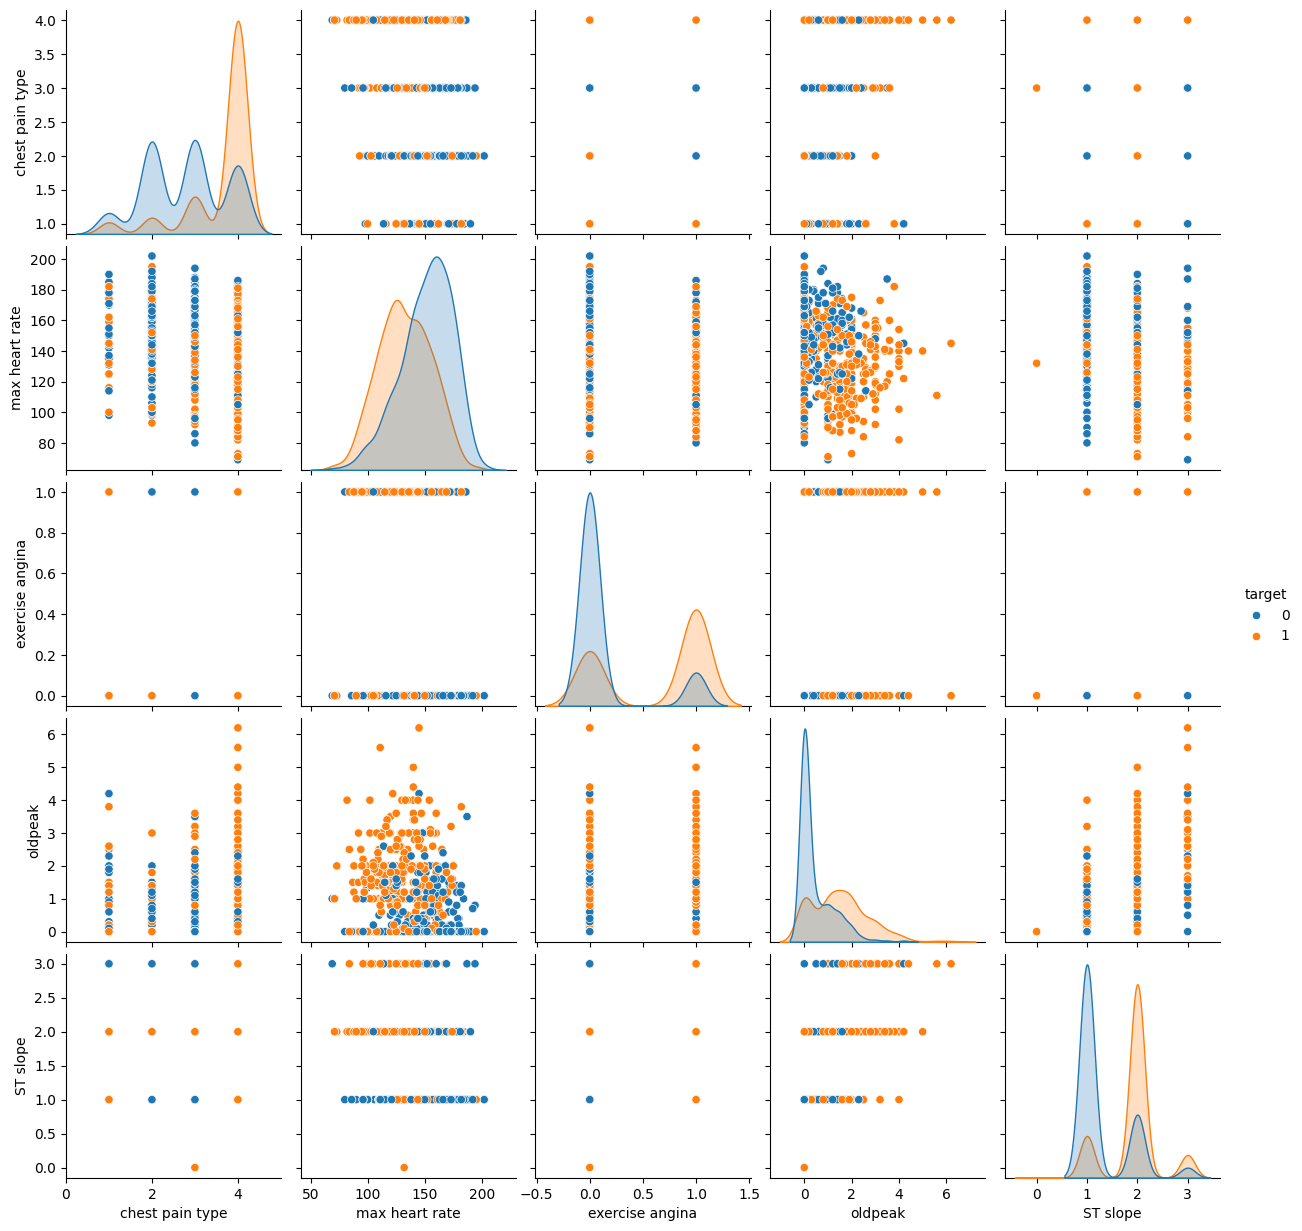

In [19]:
plt.figure(figsize=(16, 16))
sns.pairplot(df_cleaned[to_plot], hue="target")

It can be concluded that performing the cleaning slightly changed the data distributions.

## Modeling

We will apply machine learning models to two distinct DataFrames, each reflecting a different data handling strategy. The first set, referred to as 'cleaned,' will use the DataFrame where erroneous data has been removed. The second set, labeled 'meaned,' will involve models using a DataFrame where problematic values are retained but replaced with the mean of the respective feature

In [20]:
# Make all necessary imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import all models to add in the pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [21]:
# Divide the dataset cleaned target and the features
X_cleaned = df_cleaned.iloc[:,:-1]
y_cleaned = df_cleaned['target']


# Split the data in training and tesging sets.
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=0)

# Scale the features to realize the train
scaler = StandardScaler()
X_train_cleaned = scaler.fit_transform(X_train_cleaned)
X_test_cleaned = scaler.transform(X_test_cleaned)

The use of a Pipeline facilitates the automation and replication of the modeling.

In [22]:
# Create the pipeline

pipe = Pipeline([('classifier', RandomForestClassifier())])


param_grid = [
    {
        'classifier': [LogisticRegression(random_state=0)],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': np.linspace(0.01, 2, 5),
        'classifier__solver': ['liblinear']
    },
    {
        'classifier': [RandomForestClassifier(random_state=0)],
        'classifier__n_estimators': list(range(20, 301, 10)),
        'classifier__max_features': list(range(2, 20, 5))
    },
    {
        'classifier': [SVC()],
        'classifier__C': np.linspace(0.01, 2, 5),
        'classifier__kernel': ["linear", "poly", "rbf", "sigmoid"],
        'classifier__degree': [2, 3, 4]

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': list(range(2, 10)),
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2, 3]

    },
    {
        'classifier': [DecisionTreeClassifier(random_state=0)],
        'classifier__criterion': ['gini', 'entropy']
    },
    {
        'classifier': [ExtraTreesClassifier(random_state=0)],
        'classifier__n_estimators': list(range(80, 561, 20)),
        'classifier__max_features': list(range(2, 20, 5)),
        'classifier__criterion': ['gini', 'entropy']
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=0)],
        'classifier__n_estimators': list(range(50, 501, 50)),
        'classifier__learning_rate': np.linspace(0.01, 0.2, 5),
        'classifier__max_depth': list(range(3, 8))
    },
    {
        'classifier': [GaussianNB()],

    },
    {
        'classifier': [MLPClassifier(max_iter=1000, random_state=0)],
        'classifier__hidden_layer_sizes': [(100,), (100,), (100, 50)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['adam', 'lbfgs'],
        'classifier__alpha': np.logspace(-4, -1, 4)
    }
]


This function performs a Grid Search and cross-validation on the pipeline (including all its models). The purpose is to identify the hyperparameters that lead to good performance, which will then be used for training and evaluating the best models.

In [23]:
def model_GridSearchCV(pipe, param_grid, X_train, y_train):
    """Perform a grid search with cross-validation to find the best hyperparameters
        for a set of models within a pipeline and return a summary of the best models.

        Parameters:
        pipe : Pipeline,The pipeline object containing the series of transformations and the classifier.
        param_grid : dict, The dictionary containing the hyperparameters to be tested in the grid search.
        X_train, y_train : array-like or DataFrame, the training input samples and The target values
        (class labels) corresponding to X_train.

        Returns: A DataFrame containing the best models for each classifier type in the pipeline.
        The DataFrame includes the hyperparameters and the mean test score, sorted
        in descending order by performance."""

    # Initialize GridSearchCV with the pipeline, 5-fold cross-validation and optimizing for F1 scoring
    clf=  GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=1, n_jobs=-1, scoring='f1')

    # Fit the model
    best_clf = clf.fit(X_train, y_train)

    # Save the grid results in a Dataframe
    results_df = pd.DataFrame(best_clf.cv_results_)

    # Initialize an empty dictionary to store the best model for each classifier type
    dict_best_models = {}

    # Iterate over the results to find the best model for each type
    for i, row in results_df.iterrows():
        # Get the name of the classifier from the current row
        model_name = row['params']['classifier'].__class__.__name__

        # Aggregate if it isn't in the dictionary else only actualize the value
        if model_name not in dict_best_models:
            dict_best_models[model_name] = row

        else:
            if row['mean_test_score'] > dict_best_models[model_name]['mean_test_score']:
                dict_best_models[model_name] = row

    # Create a dictionary with the DataFrame
    best_models = pd.DataFrame(dict_best_models).T  # Transponer para que cada modelo sea una fila

    # Select only the columns of interest
    best_models = best_models[['params', 'mean_test_score']]

    # Sort the values by performance
    best_models.sort_values(by="mean_test_score", inplace=True, ascending=False)

    # Return the dataframe with the results
    return best_models

# Execute the function model_GridSearchCV to carry out all the procedures
best_models = model_GridSearchCV(pipe, param_grid, X_train_cleaned, y_train_cleaned)


Fitting 5 folds for each of 735 candidates, totalling 3675 fits


In [24]:
best_models

,params,mean_test_score
GradientBoostingClassifier,{'classifier': GradientBoostingClassifier(rand...,0.914005
RandomForestClassifier,{'classifier': RandomForestClassifier(random_s...,0.913636
ExtraTreesClassifier,{'classifier': ExtraTreesClassifier(random_sta...,0.909182
KNeighborsClassifier,"{'classifier': KNeighborsClassifier(), 'classi...",0.895227
MLPClassifier,"{'classifier': MLPClassifier(max_iter=1000, ra...",0.89109
SVC,"{'classifier': SVC(), 'classifier__C': 1.5025,...",0.866057
DecisionTreeClassifier,{'classifier': DecisionTreeClassifier(random_s...,0.860245
LogisticRegression,{'classifier': LogisticRegression(random_state...,0.815465
GaussianNB,{'classifier': GaussianNB()},0.801124


Above, the models with the best average of the 5 F1 scores (representing the model's performance for each cross-validation fold) in the GridSearchCV are displayed, categorized by model type. The 3 best models will be used for training with the fully cleaned and preprocessed data.

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       130
           1       0.87      0.88      0.88       125

    accuracy                           0.88       255
   macro avg       0.88      0.88      0.88       255
weighted avg       0.88      0.88      0.88       255

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       130
           1       0.88      0.91      0.89       125

    accuracy                           0.89       255
   macro avg       0.89      0.89      0.89       255
weighted avg       0.89      0.89      0.89       255

ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       130
           1       0.87      0.91      0.89       125

    accuracy                           0.89       255
   macro avg       0.89      0.89      0.89       255
wei

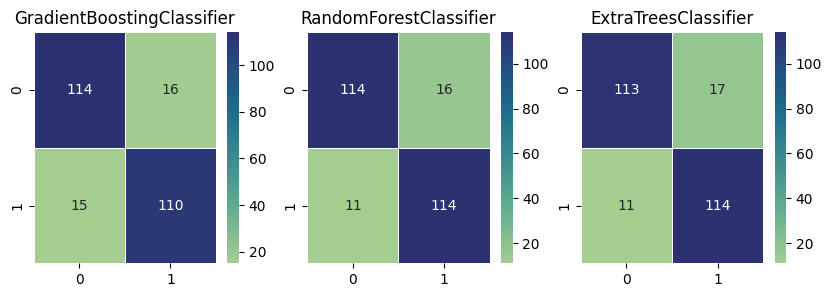

In [25]:
def create_model_from_params(params):
    model = params['classifier']
    return model

def top3_models_report(models, X_train, X_test, y_train, y_test):
    # Select the top 3 models from the dataframe
    top_3 = models.iloc[:3,:]
     # Add a new column to the DataFrame that contains the model usig
     # the function create_model_from_params() in an apply
    top_3["model"] = top_3['params'].apply(create_model_from_params)

    # Inicialize "j", to plot
    j=0
    plt.figure(figsize=(10, 3))
    for i, model in enumerate(top_3["model"]):
        # Fit the model with the data
        model.fit(X_train, y_train)
        # Performance and save the labels predicted
        y_pred = model.predict(X_test)
        # Create the confusion matrix to plot
        conf_matr = confusion_matrix(y_test, y_pred)

        # Plot the matrix in a single row and 3 columns
        # and j controls where to plot
        plt.subplot(1,3, j+1)
        sns.heatmap(conf_matr, annot=True, fmt="g", cmap="crest", linewidths=0.5)
        plt.title(top_3.index[i])

        # Increase j to plot the next matrix right
        j += 1

        # Print the clasification report of each model
        print(top_3.index[i])
        print(classification_report(y_test, y_pred))

    # Drop the 'mean_test_score' column from the DataFrame as it is no longer needed
    top_3.drop("mean_test_score", axis=1, inplace=True)

    #Add to the dataframe the recall and f1 using an apply and lambda function
    top_3['recall'] = top_3['model'].apply(lambda model: recall_score(y_test,
                                                                      model.predict(X_test)))
    top_3['f1'] = top_3['model'].apply(lambda model: f1_score(y_test,
                                                                  model.predict(X_test)))

    return top_3

top_3 = top3_models_report(best_models, X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned)

In the results of the models trained with the hyperparameters derived from the best outcomes in the GridSearchCV, we observe that performance slightly decreased when training with all the data and predicting on y_test_cleaned. However, due to the nature of the problem, we will choose the one with the best performance in 'recall.'

The same modeling procedure that was carried out from the pipelines will be performed again, this time using a DataFrame where the problematic data (issues previously mentioned in 'cholesterol,' 'oldpeak,' 'resting bp s') will not be removed, but instead, the mean of the feature will be imputed for the data with these errors.

In [26]:
# Calculate the mean of each feature to replace
real_cholesterol_mean = int(df[df["cholesterol"]>0]["cholesterol"].mean())
real_restingbps_mean = int(df[df["resting bp s"]>0]["resting bp s"].mean())
real_oldpeak_mean = int(df[df["oldpeak"]>=0]["oldpeak"].mean())

# To meaned, first create a copy of the original Dataframe
df_meaned = df.copy()

# Replace the data with errors with the mean of the corresponding feature
df_meaned.loc[df_meaned["cholesterol"]<=0, "cholesterol"] = real_cholesterol_mean
df_meaned.loc[df_meaned["resting bp s"]<=0, "resting bp s"] = real_restingbps_mean
df_meaned.loc[df_meaned["oldpeak"]<0, "oldpeak"] = real_oldpeak_mean

df_meaned.mean()



age                     53.720168
sex                      0.763866
chest pain type          3.232773
resting bp s           132.264706
cholesterol            245.775630
fasting blood sugar      0.213445
resting ecg              0.698319
max heart rate         139.732773
exercise angina          0.387395
oldpeak                  0.933529
ST slope                 1.624370
target                   0.528571
dtype: float64

In [27]:
# Divide the target and the features
X_meaned = df_meaned.iloc[:,:-1]
y_meaned = df_meaned['target']


# Split the data in training and tesging sets.
X_train_meaned, X_test_meaned, y_train_meaned, y_test_meaned = train_test_split(X_meaned, y_meaned, test_size=0.25, random_state=0)

# Scale the features to realize the train
scaler = StandardScaler()
X_train_meaned = scaler.fit_transform(X_train_meaned)
X_test_meaned = scaler.transform(X_test_meaned)
best_models_meaned = model_GridSearchCV(pipe, param_grid, X_train_meaned, y_train_meaned)
best_models_meaned

Fitting 5 folds for each of 735 candidates, totalling 3675 fits


,params,mean_test_score
ExtraTreesClassifier,{'classifier': (ExtraTreeClassifier(random_sta...,0.913477
RandomForestClassifier,{'classifier': (DecisionTreeClassifier(max_fea...,0.911037
GradientBoostingClassifier,{'classifier': ([DecisionTreeRegressor(criteri...,0.906664
KNeighborsClassifier,"{'classifier': KNeighborsClassifier(), 'classi...",0.898682
MLPClassifier,"{'classifier': MLPClassifier(max_iter=1000, ra...",0.886872
DecisionTreeClassifier,{'classifier': DecisionTreeClassifier(random_s...,0.855964
SVC,"{'classifier': SVC(), 'classifier__C': 2.0, 'c...",0.855073
LogisticRegression,{'classifier': LogisticRegression(random_state...,0.842264
GaussianNB,{'classifier': GaussianNB()},0.827223


The models with imputed means perform similarly on the GridSearchCV to the previously used cleaned models.

ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       133
           1       0.91      0.94      0.93       165

    accuracy                           0.92       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.92      0.92       298

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       133
           1       0.92      0.96      0.94       165

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       133
           1       0.91      0.90      0.91       165

    accuracy                           0.90       298
   macro avg       0.90      0.90      0.90       298
wei

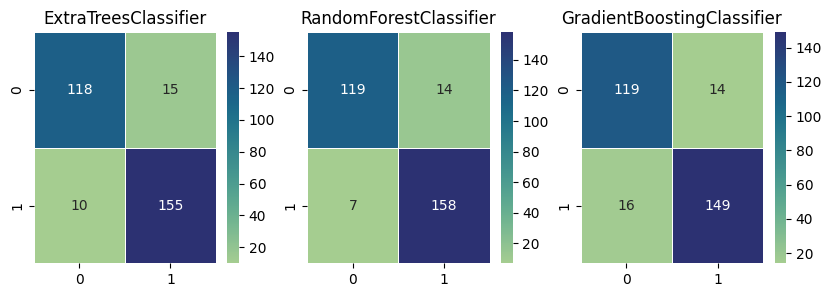

In [28]:
top_3_meaned = top3_models_report(best_models_meaned, X_train_meaned, X_test_meaned, y_train_meaned, y_test_meaned)



The models with imputed means perform better when trained with all the data and tested on 'y_test'.

Now let's compare the cleaned models with those where the mean was imputed, using recall as the evaluation metric.

In [29]:
# Add a column to differentiate the models
top_3["Dataframe"] = "Cleaned"
top_3_meaned["Dataframe"] = "Meaned"

# Join the dataframes to plot
top_6 = pd.concat([top_3, top_3_meaned])

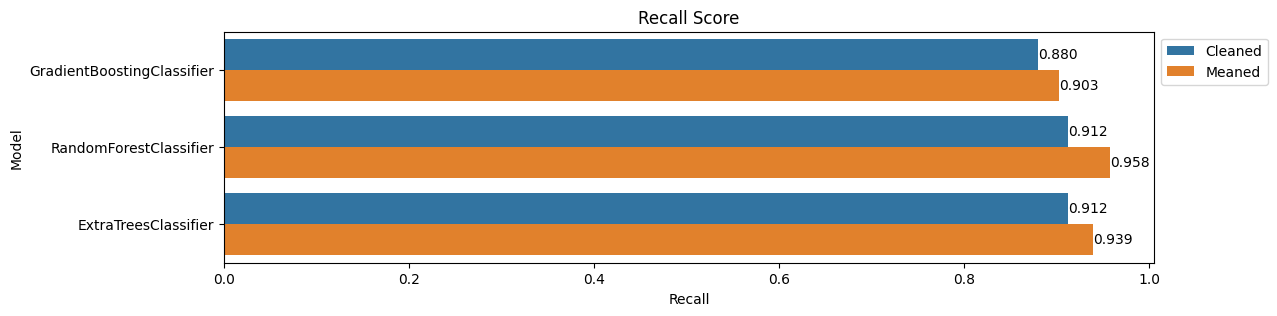

In [30]:
plt.figure(figsize=(12,3))
ax = sns.barplot(data=top_6, x="recall", y=top_6.index, hue="Dataframe")

# Add annotations to each bar with the recall value
for p in ax.patches:
    if p.get_width() > 0.001:  # Avoid displaying very small values
        ax.annotate(f'{p.get_width():.3f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')
        
# Position the legend at the best location without overlapping the plot,
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xlabel('Recall')
plt.ylabel('Model')
plt.title('Recall Score')
plt.show()

## CONCLUSIONS

* The algorithms that performed best on the datasets used (cleaned and mean-imputed) were tree-based models, which is expected, as these typically perform well in classification tasks

* It was expected that the models trained on the cleaned data would perform better due to the improved data quality. However, since the original dataset was small, and cleaning it reduced its size by 14.5%, making it even smaller, the models trained on the cleaned data performed slightly worse than those trained on the dataset where problematic values were imputed with the mean, likely due to the reduced amount of data. Nevertheless, all models achieved very good performance.

* Recall was used as the final metric to select the models, as the goal is to minimize false negatives due to the nature of the problem.


Let's take advantage of the fact that decision trees are easy to interpret to draw conclusions and identify which feature has the most influence on a heart attack.

In [31]:
# Assuming you have a list of feature names
ordered_prints = []
feature_names = df.columns.to_list()  # Replace with your actual feature names

# Function to get the most important feature from classifiers that support feature_importances_
def get_most_important_feature(classifier, feature_names):
    # Get the index of the most important feature
    most_important_index = classifier.feature_importances_.argmax()
    # Return the most important feature name and its importance score
    return feature_names[most_important_index]


# Iterate over the 'top_3' list and look for the corresponding classifier in 'top_3_meaned'
for i in range(len(top_3["params"])):
    classifier_cleaned = top_3["params"][i]['classifier']
    
    # Find the corresponding classifier in 'top_3_meaned'
    for j in range(len(top_3_meaned["params"])):
        if top_3_meaned["params"][j]['classifier'] == classifier_cleaned:
            # Get the most important feature for both the cleaned and meaned models
            cleaned_feature_name = get_most_important_feature(classifier_cleaned, feature_names)
            meaned_feature_name = get_most_important_feature(top_3_meaned["params"][j]['classifier'], feature_names)
            
            # print
            print(f"Cleaned: {top_3['params'][i]}")
            print(f"Most important feature (Cleaned): {cleaned_feature_name}")
            print(f"Meaned: {top_3_meaned['params'][j]}")
            print(f"Most important feature (Meaned): {meaned_feature_name}\n")
            break

Cleaned: {'classifier': GradientBoostingClassifier(random_state=0), 'classifier__learning_rate': 0.15250000000000002, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Most important feature (Cleaned): ST slope
Meaned: {'classifier': GradientBoostingClassifier(random_state=0), 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
Most important feature (Meaned): ST slope

Cleaned: {'classifier': RandomForestClassifier(random_state=0), 'classifier__max_features': 2, 'classifier__n_estimators': 180}
Most important feature (Cleaned): ST slope
Meaned: {'classifier': RandomForestClassifier(random_state=0), 'classifier__max_features': 2, 'classifier__n_estimators': 100}
Most important feature (Meaned): ST slope

Cleaned: {'classifier': ExtraTreesClassifier(random_state=0), 'classifier__criterion': 'entropy', 'classifier__max_features': 7, 'classifier__n_estimators': 100}
Most important feature (Cleaned): ST slope
Meaned: {'classifier': Extr

* When comparing the trees, it can be observed that the parameters between the Random Forest and Gradient Boosting models do not differ significantly, but there is a notable difference in the parameters of the Extra Trees models.
* The most important feature across all three models was 'ST slope,' which refers to the 'slope of the peak exercise ST segment.' In summary, a value of 1 is considered normal, 2 is abnormal, and 3 indicates a severe condition. This is why having a value greater than 1 in this feature is so critical in determining whether a person is likely to have a heart disease. The fact that this feature was the most important in the models was anticipated from the correlation matrix, as it showed the highest correlation with the target.

--



--



--

Thank you very much for reviewing my personal project. I hope you enjoyed it.


saguinagavelasquez@gmail.com
linkedin.com/in/saguinaga
Sebastian Aguinaga Velásquez.